In [1]:
import numpy
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [2]:
all_df = pd.read_csv("titanic.csv")

In [3]:
cols=['survived','pclass' ,'sex', 'age',
       'fare',]
df=all_df[cols]
df.isnull().sum()
df=df.values

In [4]:
X = df[:,1:]
Y = df[:,0]
X[:5]

array([[  1.    ,   0.    ,  29.    , 211.3375],
       [  1.    ,   1.    ,   0.9167, 151.55  ],
       [  1.    ,   0.    ,   2.    , 151.55  ],
       [  1.    ,   1.    ,  30.    , 151.55  ],
       [  1.    ,   0.    ,  25.    , 151.55  ]])

In [5]:
 X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

1046

In [6]:
train_Features[355:359]

array([[ 0.84246649, -1.34419751,  0.8216082 , -0.46039806],
       [ 0.84246649, -1.34419751,  0.09991351, -0.19415727],
       [ 0.84246649,  0.74393829, -0.18876436, -0.49092056],
       [-0.35140802, -1.34419751,  0.17208298, -0.23764487]])

In [7]:
train_Label[:4]

array([1., 0., 0., 0.])

In [8]:
test_Features.shape

(262, 4)

In [9]:
test_Label.shape

(262,)

In [10]:
train_Features.shape

(1046, 4)

In [11]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))

In [12]:
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [13]:
train_Features.shape

(1046, 4, 1)

In [14]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Using TensorFlow backend.


In [15]:
model = Sequential()

In [16]:
model.add(Conv1D(filters=12,
                 kernel_size=3,
                 padding='valid',
                 input_shape=(4,1), 
                 activation='relu'))

In [17]:
model.add(MaxPooling1D(pool_size=1))

In [18]:
model.add(Flatten())

In [19]:
model.add(Dense(4, activation='tanh'))

In [20]:
model.add(Dense(1,activation='sigmoid'))

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 12)             48        
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2, 12)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 24)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 100       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [23]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=30, 
                         batch_size=30,verbose=1,callbacks=[early_stopping])

Train on 836 samples, validate on 210 samples
Epoch 1/30
836/836 [==============================] - 1s 1ms/step - loss: 0.6938 - acc: 0.5921 - val_loss: 0.6254 - val_acc: 0.6476
Epoch 2/30
836/836 [==============================] - 0s 292us/step - loss: 0.6182 - acc: 0.6256 - val_loss: 0.5807 - val_acc: 0.7000
Epoch 3/30
836/836 [==============================] - 0s 407us/step - loss: 0.5666 - acc: 0.7129 - val_loss: 0.5523 - val_acc: 0.7476
Epoch 4/30
836/836 [==============================] - 0s 417us/step - loss: 0.5330 - acc: 0.7536 - val_loss: 0.5354 - val_acc: 0.7667
Epoch 5/30
836/836 [==============================] - 0s 382us/step - loss: 0.5124 - acc: 0.7739 - val_loss: 0.5270 - val_acc: 0.7476
Epoch 6/30
836/836 [==============================] - 0s 470us/step - loss: 0.5003 - acc: 0.7811 - val_loss: 0.5220 - val_acc: 0.7524
Epoch 7/30
836/836 [==============================] - 0s 406us/step - loss: 0.4938 - acc: 0.7799 - val_loss: 0.5198 - val_acc: 0.7476
Epoch 8/30
836/836

In [24]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

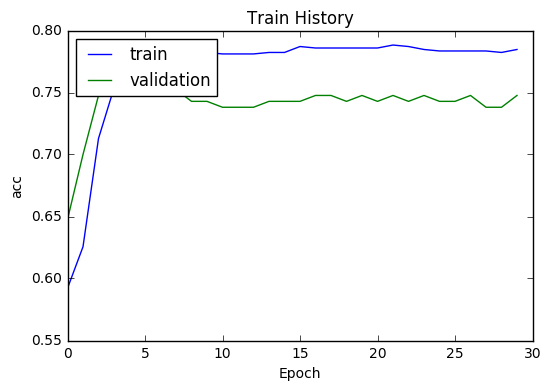

In [25]:
show_train_history(train_history,'acc','val_acc')

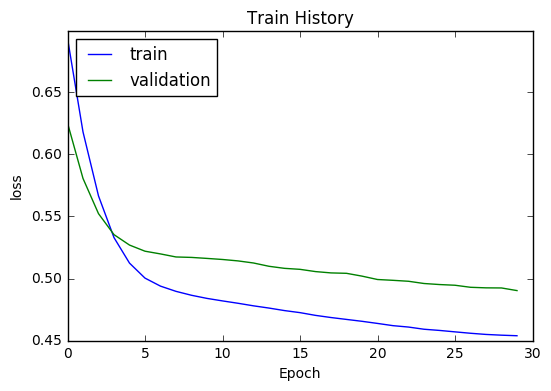

In [26]:
show_train_history(train_history,'loss','val_loss')

In [27]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

262/262 [==============================] - 0s 80us/step


In [28]:
scores[1]

0.7671755720640867